In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_fare.csv', 'Taxi Fare prediction.ipynb', 'test_fare.csv']


In [2]:
df=pd.read_csv("../input/test_fare.csv")

In [3]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,-73.973320,40.763805,-73.981430,40.743835,1,7,1,27,3,13,1,0,0
1,-73.986862,40.719383,-73.998886,40.739201,1,7,1,27,3,13,1,0,0
2,-73.982524,40.751260,-73.979654,40.746139,1,3,10,8,7,11,1,0,0
3,-73.981160,40.767807,-73.990448,40.751635,1,4,12,1,7,21,0,0,1
4,-73.966046,40.789775,-73.988565,40.744427,1,4,12,1,7,21,0,0,1


In [4]:
df.shape

(9914, 13)

In [5]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,3.815816,6.857979,16.194170,3.990014,13.467420,0.192758,0.147771,0.473169
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.960160,6.868584,0.394484,0.354891,0.499305
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2.000000,4.000000,9.000000,2.000000,8.000000,0.000000,0.000000,0.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,4.000000,7.000000,16.000000,4.000000,15.000000,0.000000,0.000000,0.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,6.000000,10.000000,25.000000,6.000000,19.000000,0.000000,0.000000,1.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,7.000000,12.000000,31.000000,7.000000,23.000000,1.000000,1.000000,1.000000


In [6]:
df1=pd.read_csv("../input/train_fare.csv")


In [7]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0


In [8]:
df1.shape

(1958885, 14)

In [9]:
df1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
count,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06,1.958885e+06
mean,1.061528e+01,-7.397526e+01,4.075089e+01,-7.397436e+01,4.075124e+01,1.684182e+00,3.736753e+00,6.268586e+00,1.570568e+01,4.122257e+00,1.350867e+01,2.363074e-01,1.398658e-01,4.344701e-01
std,6.787814e+00,4.479549e-02,3.424333e-02,4.329848e-02,3.716876e-02,1.306624e+00,1.863201e+00,3.437946e+00,8.682210e+00,1.988030e+00,6.513901e+00,4.248133e-01,3.468478e-01,4.956874e-01
min,3.300000e+00,-7.953506e+01,3.579768e+01,-7.948642e+01,3.556155e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073653e+01,-7.399160e+01,4.073550e+01,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075333e+01,-7.398062e+01,4.075383e+01,1.000000e+00,4.000000e+00,6.000000e+00,1.600000e+01,4.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,5.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,3.027000e+01,-7.000039e+01,4.426142e+01,-7.000227e+01,4.467143e+01,9.000000e+00,7.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
df.columns , df1.columns

(Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'passenger_count', 'year', 'month', 'day',
        'dayOfWeek', 'hour', 'timeOfDayMid.Day', 'timeOfDayMorning',
        'timeOfDayNight'],
       dtype='object'),
 Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
        'month', 'day', 'dayOfWeek', 'hour', 'timeOfDayMid.Day',
        'timeOfDayMorning', 'timeOfDayNight'],
       dtype='object'))

In [11]:
test=df.dropna()

In [12]:
 train=df1.dropna()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

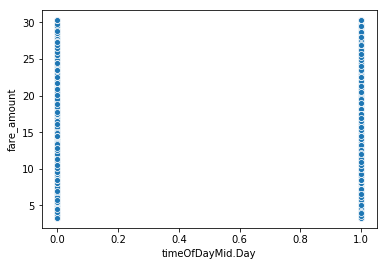

In [14]:
sns.scatterplot(train['timeOfDayMid.Day'] ,train['fare_amount'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

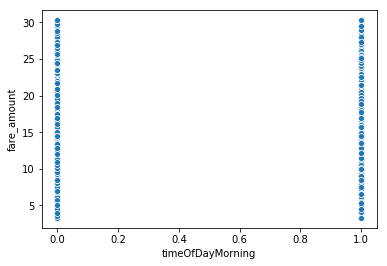

In [15]:
sns.scatterplot(train['timeOfDayMorning'] ,train['fare_amount'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

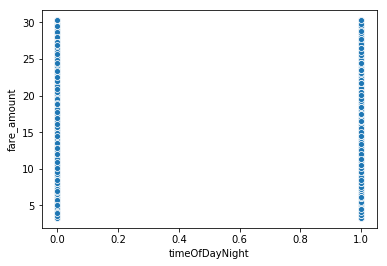

In [16]:
sns.scatterplot(train['timeOfDayNight'] ,train['fare_amount'])
plt.show

In [17]:
def getEuclidean_distance(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude):
    return np.sqrt(((pickup_longitude-dropoff_longitude)**2) + ((pickup_latitude-dropoff_latitude)**2))
train['euclidean_dist'] = getEuclidean_distance(train.pickup_longitude, train.pickup_latitude,train.dropoff_longitude,train.dropoff_latitude).astype(np.float32)

<function matplotlib.pyplot.show(*args, **kw)>

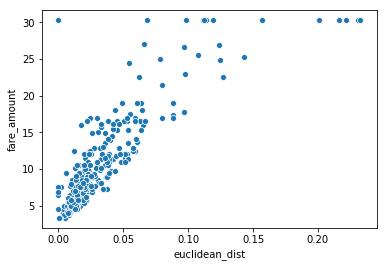

In [18]:
sns.scatterplot(train.euclidean_dist[0:300] , train.fare_amount[0:300])
plt.show

In [19]:
# Importing the dataset
X = (train.iloc[:, train.columns != 'fare_amount'])
y = (train['fare_amount'])

In [20]:
from sklearn.model_selection import train_test_split #set splitting and validation

#Split train set into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(X_train.shape)
print(y_train.shape)

(1567108, 14)
(1567108,)


In [24]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.5277895929848
0.5050139366332169


In [25]:
print(regressor.intercept_),
print(regressor.coef_)

10.612094495082578
[ 3.63979652e-01 -4.41866666e-02  7.85178996e-01 -4.37886557e-01
  6.88977753e-02  8.27834515e-01  2.51729669e-01  1.54318570e-02
  6.01757828e-02 -2.82546453e-02 -4.17669112e-03 -1.45285218e-01
 -1.10140125e-01  4.41437215e+00]


In [26]:
y_pred=regressor.predict(X_test)

In [27]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test ,y_pred))
print(metrics.mean_squared_error(y_test ,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test ,y_pred)))

2.9205643127211087
22.883098308335022
4.783628153225857


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score*100)

50.50139366332169


In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(10) 

,Actual,Predicted
678229,10.00,9.490340
1611561,24.50,17.031377
731459,6.50,9.506919
174668,20.33,14.233779
1635387,9.70,6.407988
1737463,10.90,11.481807
1464178,5.70,8.364242
760493,7.50,8.902141
590829,8.90,8.655444
1230822,13.00,13.040419


In [30]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train ,y_train)
accuracy=regressor.score(X_test,y_test)
print(accuracy*100,'%')

50.50139366332169 %
